# COMP0005 - GROUP COURSEWORK
# Experimental Evaluation of Search Data Structures and Algorithms

The cell below defines **AbstractSearchInterface**, an interface to support basic insert/search operations; you will need to implement this three times, to realise your three search data structures of choice among: (1) *2-3 Tree*, (2) *AVL Tree*, (3) *LLRB BST*; (4) *B-Tree*; and (5) *Scapegoat Tree*. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [45]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractSearchInterface(ABC):
    '''
    Abstract class to support search/insert operations (plus underlying data structure)
    
    '''
        
    @abstractmethod
    def insertElement(self, element):     
        '''
        Insert an element in a search tree
            Parameters:
                    element: string to be inserted in the search tree (string)

            Returns:
                    "True" after successful insertion, "False" if element is already present (bool)
        '''
        
        pass 
    

    @abstractmethod
    def searchElement(self, element):
        '''
        Search for an element in a search tree
            Parameters:
                    element: string to be searched in the search tree (string)

            Returns:
                    "True" if element is found, "False" otherwise (bool)
        '''

        pass

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [46]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE
class AVLNode:
    def __init__(self, value: str):
        self.value: str = value
        self.left:AVLNode = None
        self.right:AVLNode = None
        self.height:int = 1

def height(node) -> int:
    if not node:
        return 0
    return node.height

def balance_factor(node) -> int:
    if not node:
        return 0
    return height(node.left) - height(node.right)

def update_height(node):
    if not node:
        return
    node.height = max(height(node.left), height(node.right)) + 1


def right_rotate(y):
    """Right rotate the unbalanced node"""

    x = y.left
    T2 = x.right
    x.right = y
    y.left = T2

    update_height(y)
    update_height(x)

    return x

def left_rotate(x):
    """Left rotate the unbalanced node"""

    y = x.right
    T2 = y.left
    y.left = x
    x.right = T2

    update_height(x)
    update_height(y)

    return y

def balance(node):
    bf = balance_factor(node)
    if bf > 1:
        if balance_factor(node.left) < 0:  # LR
            node.left = left_rotate(node.left)
        return right_rotate(node) ## LL
    if bf < -1:
        if balance_factor(node.right) > 0: # RL
            node.right = right_rotate(node.right)
        return left_rotate(node)  ## RR
    return node

Use the cell below to implement the requested API by means of **AVL Tree** (if among your chosen data structure).

In [47]:
class AVLTree(AbstractSearchInterface):
    def __init__(self):
        self.root = None

    def _insert(self, node, element) -> tuple[AVLNode, bool]:
        if not node:
            return AVLNode(element), True
    
        if element == node.value:
            return node, False
        if element < node.value:
            node.left, inserted = self._insert(node.left, element)
        else:
            node.right, inserted = self._insert(node.right, element)
        
        if not inserted:
            return node, False
        
        update_height(node)
        return balance(node), True

    def insertElement(self, element):
        self.root, inserted = self._insert(self.root, element)
        return inserted
    
    def _search(self, node, element) -> bool:
        if not node:
            return False

        if element == node.value:
            return True

        if element < node.value:
            return self._search(node.left, element)
        else:
            return self._search(node.right, element)

    def searchElement(self, element):     
        
        return self._search(self.root, element) 

In [48]:

import random
import string
import timeit

def generate_random_string(length=5):
    return ''.join(random.choices(string.ascii_lowercase, k=length))


def test_avl_tree():
    avl = AVLTree()
    
    # 1. Basic Insert and Search
    print("Test Case 1: Basic Insert and Search")
    test_values = [generate_random_string() for _ in range(5)]
    print(f"Inserting values: {test_values}")
    for val in test_values:
        result = avl.insertElement(val)
        assert result is True, f"Insertion failed for {val}"
    
    for val in test_values:
        assert avl.searchElement(val) is True, f"Search failed for {val}"
    
    # non-existent value
    non_existent = generate_random_string()
    while non_existent in test_values:  
        non_existent = generate_random_string()
    assert avl.searchElement(non_existent) is False, f"Found non-existent value {non_existent}"
    print("Test Case 1 passed")
    
    # 2. Repeat Insertion
    print("\nTest Case 2: Duplicate Insertion")
    dup_val = test_values[0]
    result = avl.insertElement(dup_val)
    assert result is False, f"Duplicate insertion should return False for {dup_val}"
    assert avl.searchElement(dup_val) is True, f"Duplicate value {dup_val} not found"
    print("Test Case 2 passed")
    
    # 3. Edge Cases
    print("\nTest Case 3: Edge Cases")
    # Empty AVL
    empty_avl = AVLTree()
    assert empty_avl.searchElement("test") is False, "Empty tree search failed"
    
    # Single Node AVL
    single_avl = AVLTree()
    single_val = generate_random_string()
    assert single_avl.insertElement(single_val) is True, "Single node insertion failed"
    assert single_avl.searchElement(single_val) is True, "Single node search failed"
    print("Test Case 3 passed")
    
    
    # 4. Stress Test
    print("\nTest Case 4: Stress Test")
    stress_avl = AVLTree()
    stress_values = set()  
    while len(stress_values) < 1000: 
        stress_values.add(generate_random_string())
    stress_values = list(stress_values)
    
    # insert time
    insert_time = timeit.timeit(
        lambda: [stress_avl.insertElement(val) for val in stress_values],
        number=1
    )
    print(f"Time to insert 1000 elements: {insert_time:.4f} seconds")
    
    # search time
    for val in stress_values:
        assert stress_avl.searchElement(val) is True, f"Stress test search failed for {val}"
    
    # non-existent value
    non_existent = generate_random_string()
    while non_existent in stress_values:
        non_existent = generate_random_string()
    assert stress_avl.searchElement(non_existent) is False, "Stress test found non-existent value"
    print("Test Case 4 passed")
    
    #
    print("\nTest Case 5: Implicit Balance Check")
    print("If stress test passed with 1000 insertions, balance is likely maintained")
    print("Test Case 5 passed (implicitly)")


try:
    test_avl_tree()
    print("\nAll tests passed successfully!")
except AssertionError as e:
    print(f"Test failed: {str(e)}")

Test Case 1: Basic Insert and Search
Inserting values: ['mjepy', 'bgxut', 'wwqyf', 'etymo', 'lifyq']
Test Case 1 passed

Test Case 2: Duplicate Insertion
Test Case 2 passed

Test Case 3: Edge Cases
Test Case 3 passed

Test Case 4: Stress Test
Time to insert 1000 elements: 0.0024 seconds
Test Case 4 passed

Test Case 5: Implicit Balance Check
If stress test passed with 1000 insertions, balance is likely maintained
Test Case 5 passed (implicitly)

All tests passed successfully!


Use the cell below to implement the **synthetic data generator** needed by your experimental framework (be mindful of code readability and reusability).

In [49]:
import string
import random

class TestDataGenerator():
    '''
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    '''
    
    #ADD YOUR CODE HERE

    def generate_random_strings(self, size, length) -> list[str]:
        """Generate a list of random strings."""

        return [''.join(random.choice(string.ascii_lowercase) for _ in range(length)) for _ in range(size)]

    def generate_sorted_strings(self, size, length) -> list[str]:
        """Generate a sorted list of random strings."""

        data = self.generate_random_strings(size, length)
        return sorted(data)
    
    def generate_strings_with_duplicates(self, size, length, duplicate_rate) -> list[str]:
        """Generate a list of random strings with a specified duplicate rate."""

        if not 0 <= duplicate_rate <= 1:
            raise ValueError("duplicate_rate must be between 0 and 1")
        
        unique_count = int(size * (1 - duplicate_rate))
        duplicate_count = size - unique_count
        unique_strings = self.generate_random_strings(unique_count, length)
        duplicates = [random.choice(unique_strings) for _ in range(duplicate_count)]
        result = unique_strings + duplicates
        random.shuffle(result)
        return result
    
    def generate_almost_sorted_strings(self, size, length, cross_factor) -> list[str]:
        """
        Generate an almost sorted list of strings by segmenting into 5 parts and crossing segments.
        
        Parameters:
        - size: Number of strings to generate
        - length: Length of each string
        - cross_factor: Probability of crossing adjacent segments (0 to 1)
        
        Returns:
        - List of almost sorted strings
        """
        if not 0 <= cross_factor <= 1:
            raise ValueError("cross_factor must be between 0 and 1")
        
        # Generate sorted strings
        data = self.generate_sorted_strings(size, length)
        
        # Segment data into 5 parts
        segment_size = size // 5
        segments = [data[i * segment_size:(i + 1) * segment_size] for i in range(5)]
        
        # Handle remainder
        remainder = data[5 * segment_size:]
        if remainder:
            segments[-1].extend(remainder)
        
        # Cross segments
        for i in range(4):  # 0-1, 1-2, 2-3, 3-4
            if random.random() < cross_factor:

                segments[i], segments[i + 1] = segments[i + 1], segments[i]
        
        # Merge segments
        result = []
        for segment in segments:
            result.extend(segment)
        
        return result
    

Use the cell below to implement the requested **experimental framework** (be mindful of code readability and reusability).

In [50]:
# import timeit
# import matplotlib

# class ExperimentalFramework():
#     '''
#     A class to represent an experimental framework.

#     ...

#     Attributes
#     ----------
    
#     [to be defined as part of the coursework]

#     Methods
#     -------
    
#     [to be defined as part of the coursework]

#     '''

import timeit
import matplotlib.pyplot as plt

class ExperimentalFramework:
    def __init__(self):
        self.data_generator = TestDataGenerator()

    def measure_insert_time(self, tree, data):
        """Measure the time to insert all elements."""
        return timeit.timeit(lambda: [tree.insertElement(x) for x in data], number=1)

    def measure_search_time(self, tree, data):
        """Measure the average search time for 10 random searches."""
        return timeit.timeit(lambda: tree.searchElement(random.choice(data)), number=1000) / 1000

    def test_avl_performance(self, input_sizes, tree_class):
        """Test AVL Tree performance for insert and search operations."""
        insert_times_random = []
        insert_times_sorted = []
        search_times_random = []
        search_times_sorted = []

        print("Input Size: \t", input_sizes)

        # Test with random data
        print("Random: ", end="")
        for size in input_sizes:
            data = self.data_generator.generate_random_strings(size, 5)
            tree = tree_class()
            insert_time = self.measure_insert_time(tree, data)
            insert_times_random.append(round(insert_time, 5))
            search_time = self.measure_search_time(tree, data)
            search_times_random.append(round(search_time, 5))
        print(f"InsertAVL:\t{insert_times_random}")
        print(f"SearchAVL:\t{search_times_random}")

        # Test with sorted data
        print("Sorted: ", end="")
        for size in input_sizes:
            data = self.data_generator.generate_sorted_strings(size, 5)
            tree = tree_class()
            insert_time = self.measure_insert_time(tree, data)
            insert_times_sorted.append(round(insert_time, 5))
            search_time = self.measure_search_time(tree, data)
            search_times_sorted.append(round(search_time, 5))
        print(f"InsertAVL:\t{insert_times_sorted}")
        print(f"SearchAVL:\t{search_times_sorted}")
        print()

        # Plot results
        self.plot_results(input_sizes, insert_times_random, insert_times_sorted, search_times_random, search_times_sorted)

    def plot_results(self, sizes, insert_random, insert_sorted, search_random, search_sorted):
        """Plot performance results with linear scale on x-axis."""
        print("Generating Insert Time Plot...")
        plt.figure()
        plt.plot(sizes, insert_random, label='Random Data')
        plt.plot(sizes, insert_sorted, label='Sorted Data')

        plt.xlabel('Input Size')
        plt.ylabel('Time (seconds)')
        plt.title('AVL Insert Time vs Input Size')
        max_insert = max(max(insert_random), max(insert_sorted))
        plt.ylim(0, max_insert * 1.1)  
        plt.grid(True)
        plt.legend()
        plt.show()

        print("Generating Search Time Plot...")
        plt.figure()
        plt.plot(sizes, search_random, label='Random Data')
        plt.plot(sizes, search_sorted, label='Sorted Data')

        plt.xlabel('Input Size')
        plt.ylabel('Time (seconds)')
        plt.title('AVL Search Time vs Input Size')
        max_search = max(max(search_random), max(search_sorted))
        if max_search > 0:
            plt.ylim(0, max_search * 1.1) 
        else:
            plt.ylim(0, 0.0001)  
        plt.grid(True)
        plt.legend()
        plt.show()
    

Use the cell below to illustrate the python code you used to **fully evaluate** your three chosen search data structures and algortihms. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each data structure using such data, collect information about their execution time, plot results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

Testing AVL Tree performance...
Input Size: 	 [100, 1000, 2000, 4000, 8000, 10000, 16000, 20000, 40000]
Random: InsertAVL:	[0.00019, 0.0024, 0.00522, 0.01146, 0.02468, 0.04271, 0.05737, 0.07096, 0.15605]
SearchAVL:	[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Sorted: InsertAVL:	[0.00017, 0.00246, 0.00517, 0.01162, 0.02417, 0.03204, 0.05283, 0.06907, 0.144]
SearchAVL:	[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Generating Insert Time Plot...


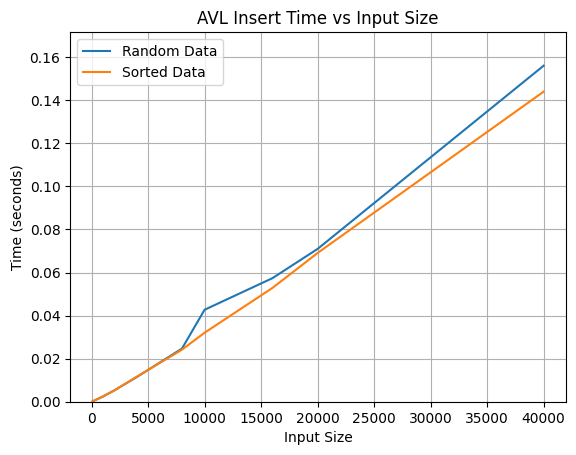

Generating Search Time Plot...


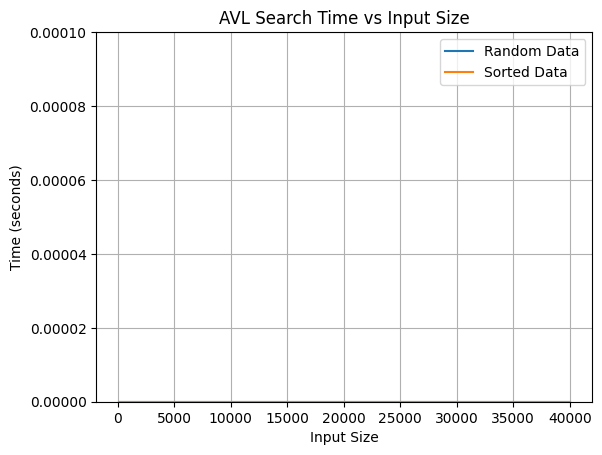

In [51]:
# ADD YOUR TEST CODE HERE 
# Constants
STR_LEN = 5
DUPLICATE_RATE = 0.2
CROSS_FACTOR = 0.5

# Exponent of 10 for input sizes
input_sizes = [100, 1000, 2000, 4000, 8000, 10000, 16000, 20000, 40000]
# input_sizes = [10**i for i in range(2, 7)]

# Initialize framework
framework = ExperimentalFramework()

# Test AVL Tree
print("Testing AVL Tree performance...")
framework.test_avl_performance(input_sizes, AVLTree)


